# Part I - (Prosper Loans Dataset Exploration)
## by (Jennifer Chinenye Umoke)

## Introduction
> The Prosper Loans Dataset contains information about over 100,000 loans listed on the American crowd-lending site from 2005 to 2014. It contains 81 datapoints on each listed loan. 


## Preliminary Wrangling


In [182]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [183]:
# loading the dataset
loan_data = pd.read_csv('prosperLoanData.csv')
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [184]:
# enumerating the various columns in the dataset
loan_data.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [185]:
# checking the shape of the dataset
loan_data.shape

(113937, 81)

As earlier stated, the dataset contains 113,397 rows and 81 columns. 

There are 81 variables in loan_data however I cannot use all of them in my analyis. Below are the variables I will be analysing:
- loan status
- borrower APR
- borrower rate
- listing category
- occupation
- isborrowerhomeowner
- income verifiable
- stated monthly income
- loan original amount
- total trades

I have chosen these variables because they most closely align with the central question I will try to answer with my analysis, 'what are the most important factors that affect a borrower's ability to pay back their loan?'
Outlined below are the definitions of each variable and the data they hold:

BorrowerAPR: This column holds the Annual Percentage Rate of the loans. APR is the cost of borrowing. It includes the interest rate and other charges that the lender collects on the loan. 
BorrowerRate: This column contains the interest rate on each loan. 
Listing Category: This column holds information on what borrowers intend to use their loans for. 
Loan Status: This shows the state of the loan, ie whether it has been fully paid, still being serviced, whether the borrower has defaulted on it and if yes, the period of deliquency ie how long the loan has stayed unserviced. 

IsBorrowerHomeOwner: This column contained boolean values of whether or not the borrower owns real estate. 

IncomeVerifiable: This column contains boolean values of whether or not the borrower has submitted documentation to support their stated monthly income claims. 

LoanOriginalAmount: This column records the principal sum borrowed. 

TotalTrades: This column shows the overall number of tradelines that the borrower has. A tradeline is a credit account. 




In [186]:
# creating a dataframe with only the features I'll be using in my analysis.
ld_small = loan_data[['LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ListingCategory (numeric)',
'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'StatedMonthlyIncome', 'IncomeVerifiable', 
'LoanOriginalAmount', 'TotalTrades']]

ld_small.head()

,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory (numeric),Occupation,EmploymentStatus,IsBorrowerHomeowner,StatedMonthlyIncome,IncomeVerifiable,LoanOriginalAmount,TotalTrades
0,Completed,0.16516,0.1580,0,Other,Self-employed,True,3083.333333,True,9425,11.0
1,Current,0.12016,0.0920,2,Professional,Employed,False,6125.000000,True,10000,29.0
2,Completed,0.28269,0.2750,0,Other,Not available,False,2083.333333,True,3001,NaN
3,Current,0.12528,0.0974,16,Skilled Labor,Employed,True,2875.000000,True,10000,26.0
4,Current,0.24614,0.2085,2,Executive,Employed,True,9583.333333,True,15000,39.0


In [187]:
# finding info about small dataset
ld_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanStatus                 113937 non-null  object 
 1   BorrowerAPR                113912 non-null  float64
 2   BorrowerRate               113937 non-null  float64
 3   ListingCategory (numeric)  113937 non-null  int64  
 4   Occupation                 110349 non-null  object 
 5   EmploymentStatus           111682 non-null  object 
 6   IsBorrowerHomeowner        113937 non-null  bool   
 7   StatedMonthlyIncome        113937 non-null  float64
 8   IncomeVerifiable           113937 non-null  bool   
 9   LoanOriginalAmount         113937 non-null  int64  
 10  TotalTrades                106393 non-null  float64
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 8.0+ MB


From the above, we can see that there are some columns with missing values. I will resolve that in the preliminary data wrangling section.

## preliminary data wrangling
### Data wrangling tasks
- change the values of ListingCategory into categories listed in the data dictionary
- convert stated monthly income to int
- fill TotalTrades empty columns with mean
- Put the different occupations into categories to make visualisation more manageable
- Some values in monthly income are so small that they might be erroneous. Plot an exploratory bar chart to look at this. 

- Fill missing values in Occupation with the mode
- Fill missing values in EmploymentStatus with the mode
- Fill missing values in TotalTrades with the mean
- Fill missing values in BorrowerAPR with the mean



In [188]:
# change the values of ListingCategory into categories listed in the data dictionary
categories = np.arange(0, 21)
listings = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 
'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases', 
'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans']



In [189]:
ld_small['ListingCategory (numeric)'].replace(to_replace=categories, value=listings, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [190]:
# rename listing category
ld_small.rename(columns={'ListingCategory (numeric)' : 'ListingCategory'}, inplace=True )
ld_small.ListingCategory.head(3)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


0       Not Available
1    Home Improvement
2       Not Available
Name: ListingCategory, dtype: object

In [191]:
# convert stated monthly income to int
ld_small.StatedMonthlyIncome = ld_small.StatedMonthlyIncome.astype('int')
ld_small.StatedMonthlyIncome.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0    3083
1    6125
2    2083
3    2875
4    9583
Name: StatedMonthlyIncome, dtype: int64

In [192]:
# fill empty values with mean of total trades
ld_small.TotalTrades.fillna(ld_small.TotalTrades.mean(), inplace=True)
ld_small.TotalTrades.isnull().sum()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0

In [193]:
# fill empty values with mean of BorrowerAPR
ld_small.BorrowerAPR.fillna(ld_small.BorrowerAPR.mean(), inplace=True)
ld_small.TotalTrades.isnull().sum()

0

In [194]:
# fill empty values with mode of occupation
ld_small.Occupation.fillna(ld_small.Occupation.mode()[0], inplace=True)
ld_small.Occupation.isnull().sum()

0

In [195]:
# fill empty values with mode of employment status
ld_small.EmploymentStatus.fillna(ld_small.EmploymentStatus.mode()[0], inplace=True)
ld_small.EmploymentStatus.isnull().sum()

0

In [196]:
# convert total trades to int
ld_small.TotalTrades = ld_small.TotalTrades.astype('int')
ld_small.TotalTrades.dtype

dtype('int64')

In [197]:
# round BorrowerAPR to 2 decimal places
ld_small.BorrowerAPR = ld_small.BorrowerAPR.round(2)
ld_small.BorrowerAPR.head()

0    0.17
1    0.12
2    0.28
3    0.13
4    0.25
Name: BorrowerAPR, dtype: float64

In [198]:
# round BorrowerRate to 2 decimal places
ld_small.BorrowerRate = ld_small.BorrowerRate.round(2)
ld_small.BorrowerRate.head()

0    0.16
1    0.09
2    0.28
3    0.10
4    0.21
Name: BorrowerRate, dtype: float64

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.





Firstly, I will make  a univariate plot of income to find how values are distributed because income is one of my major variables of interest which I will be using in bivariate and multivariate plots. 

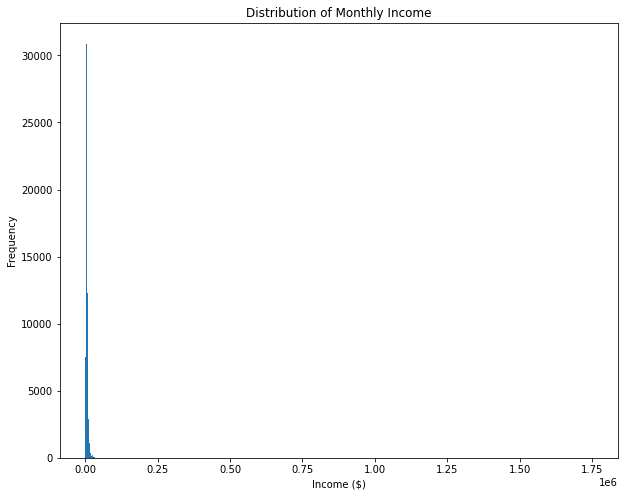

In [199]:
# Distribution of Monthly Income
plt.figure(figsize=[10, 8])
binsize = 1000
bins = np.arange(0, ld_small.StatedMonthlyIncome.max()+binsize, binsize)
plt.hist(data=ld_small, x='StatedMonthlyIncome', bins=binsize)
plt.title('Distribution of Monthly Income')
plt.xlabel('Income ($)')
plt.ylabel('Frequency')
plt.show();

This plot shows that there are very strong outliers on the left side of the dataset. To further investigate, I will find the max income value.

In [200]:
print(ld_small.StatedMonthlyIncome.max())

1750002


A maximum value of 1.75 million is a very high outlier that would distort my analysis, so I will be excluding it from my dataset. Also, it is very likely that the value was recorded in error. 
Next, I will run the describe function to find the distribution of the dataset in terms of the 25th, 50th and 75th quantile.

In [201]:
ld_small.StatedMonthlyIncome.describe()

count    1.139370e+05
mean     5.607707e+03
std      7.478491e+03
min      0.000000e+00
25%      3.200000e+03
50%      4.666000e+03
75%      6.825000e+03
max      1.750002e+06
Name: StatedMonthlyIncome, dtype: float64

In [202]:
# dropping the large outlier
ld_small = ld_small.query('StatedMonthlyIncome < 1750002')

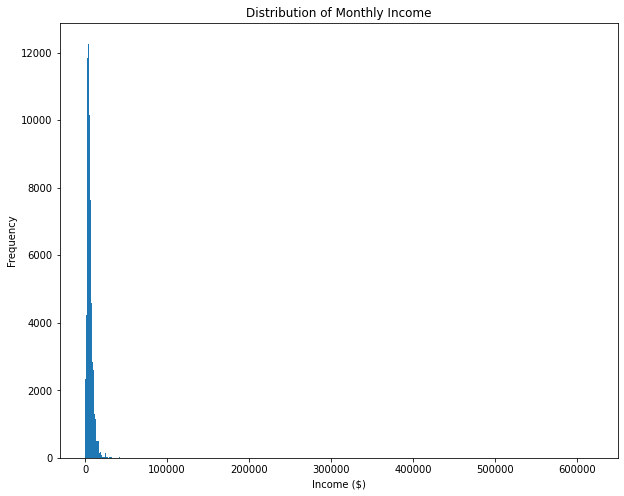

In [203]:
# plotting the distribution of income again
plt.figure(figsize=[10, 8])
binsize = 1000
bins = np.arange(0, ld_small.StatedMonthlyIncome.max()+binsize, binsize)
plt.hist(data=ld_small, x='StatedMonthlyIncome', bins=binsize)
plt.title('Distribution of Monthly Income')
plt.xlabel('Income ($)')
plt.ylabel('Frequency')

plt.show();

From the above plot, values above 500k are still outliers, I will make another plot with 100k as the upper limit.

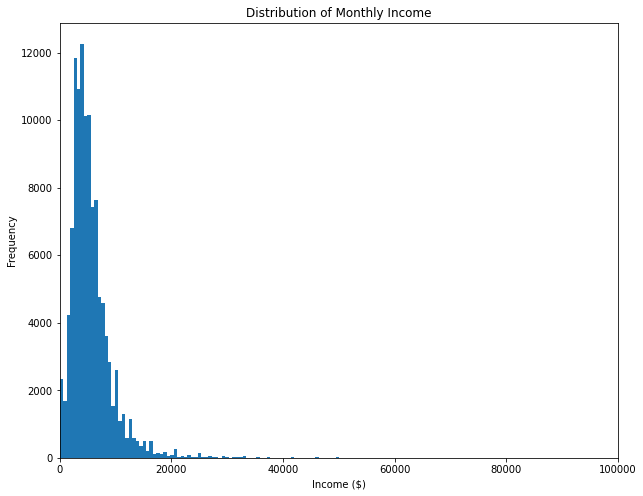

In [204]:
plt.figure(figsize=[10, 8])
binsize = 1000
bins = np.arange(0, ld_small.StatedMonthlyIncome.max()+binsize, binsize)
plt.hist(data=ld_small, x='StatedMonthlyIncome', bins=binsize)
plt.title('Distribution of Monthly Income')
plt.xlabel('Income ($)')
plt.ylabel('Frequency')


plt.xlim(0, 10e4)

plt.show()

$100k is still an outlier. From the above plot, the highest salary value where bars are present is $50k. However, the data is still highly right skewed meaning that there are still strong outliers on the upper income scale. 
Next, I will set the limit of the chart to 50k. 

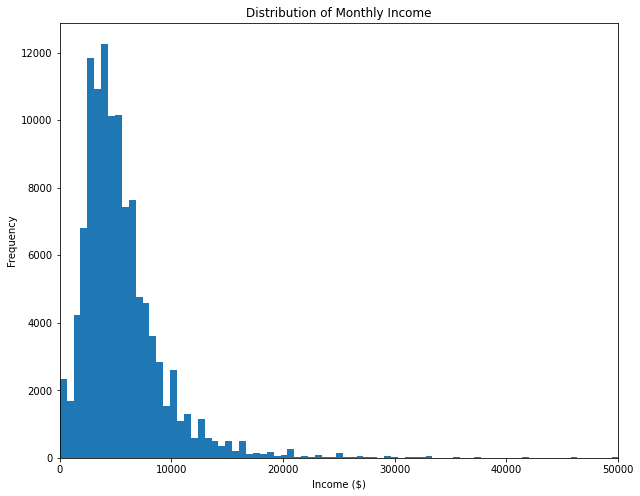

In [205]:
plt.figure(figsize=[10, 8])
binsize = 1000
bins = np.arange(0, ld_small.StatedMonthlyIncome.max()+binsize, binsize)
plt.hist(data=ld_small, x='StatedMonthlyIncome', bins=binsize)
plt.title('Distribution of Monthly Income')
plt.xlabel('Income ($)')
plt.ylabel('Frequency')
plt.xlim(0, 50e3)

plt.show()

In [206]:
# dropping all values above 50k
ld_small = ld_small.query('StatedMonthlyIncome <= 50000')

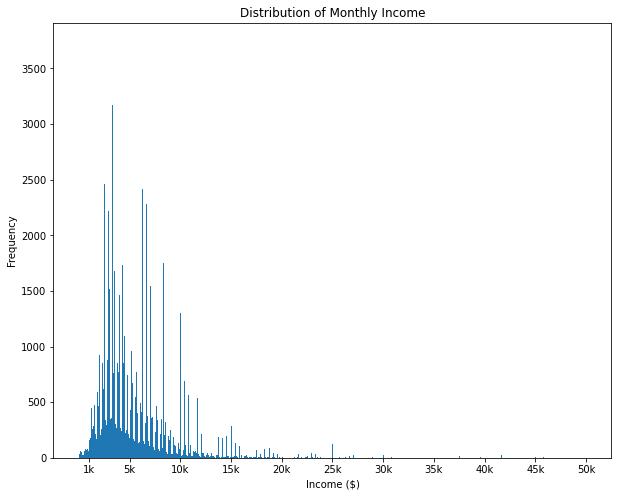

In [207]:
# plotting the income histogram without outliers above 50k
plt.figure(figsize=[10, 8])
binsize = 1000
bins = np.arange(0, ld_small.StatedMonthlyIncome.max()+binsize, binsize)
plt.hist(data=ld_small, x='StatedMonthlyIncome', bins=binsize)
plt.title('Distribution of Monthly Income')
plt.xlabel('Income ($)')
plt.ylabel('Frequency')
plt.xticks([1e3, 5e3, 10e3, 15e3, 20e3, 25e3, 30e3, 35e3, 40e3, 45e3, 50e3], ['1k', '5k', '10k', '15k', '20k', '25k', '30k', '35k', '40k', '45k', '50k'])
plt.show()

The above chart shows that most of the values of the monthly income are clustered around 1-10k, with peaks at other points. The distribution is left-skewed and with a longer tail and will therefore benefit from a log transformation.

Furthermore, after removing the outliers, the bars are narrower. I will like to check the current shape of the dataset and also plot another histogram with a different bin size.

In [208]:
ld_small.shape

(113854, 11)

The current size is still over a hundred thousand rows. I think this is still fairly sizeable, however, I will reduce the binsize in a later visualisation. 
Next, I want to plot the distribution of income on a log scale transformation.

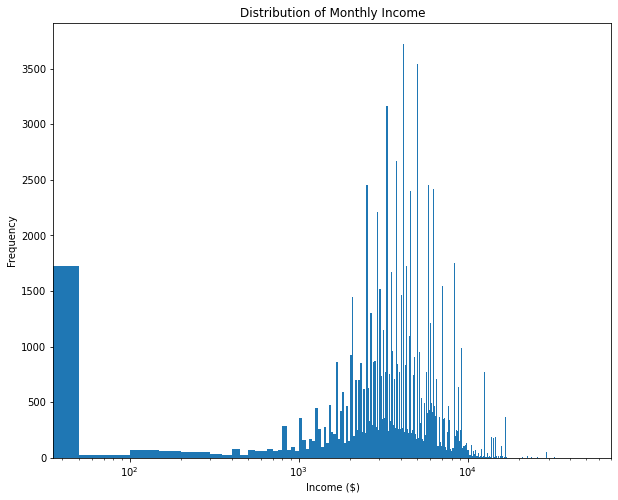

In [209]:
_1kbins=1000
plt.figure(figsize=[10, 8])
plt.hist(data=ld_small, x='StatedMonthlyIncome', bins=_1kbins)
plt.title('Distribution of Monthly Income')
plt.xlabel('Income ($)')
plt.ylabel('Frequency')
plt.xscale('log')

plt.show()

The chart above has differnt widths which means that it has unequal class intervals, this is due to the high number of data points that are clustered around 0.
Below I will make another plot with equal bar widths by removing the income values that are smaller than £500. I will also set the binsize to 50. 

In [210]:
# dropping values below 500
ld_small = ld_small.query('StatedMonthlyIncome > 500')

In [252]:
ld_small.shape

(111637, 13)

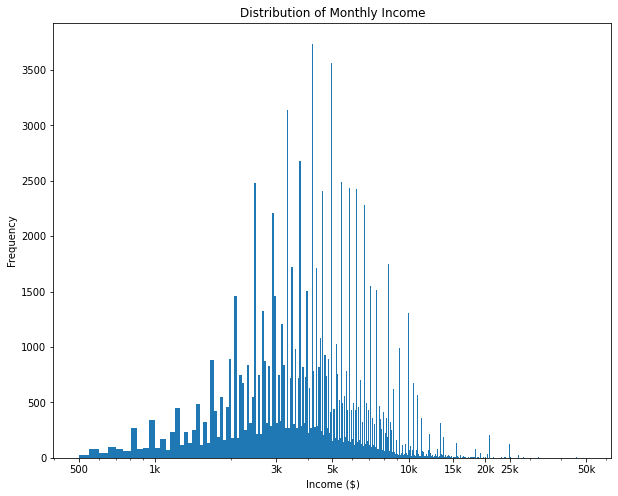

In [211]:
binsize = 50
bins = np.arange(ld_small.StatedMonthlyIncome.min(), ld_small.StatedMonthlyIncome.max()+binsize, binsize)

plt.figure(figsize=[10, 8])
plt.hist(data=ld_small, x='StatedMonthlyIncome', bins=bins)
plt.xscale('log')
plt.xticks([500, 1e3, 3e3, 5e3, 10e3, 15e3, 20e3, 25e3, 50e3], ['500', '1k', '3k', '5k', '10k', '15k', '20k', '25k', '50k'])
plt.title('Distribution of Monthly Income')
plt.xlabel('Income ($)')
plt.ylabel('Frequency')

plt.show()

Using a log transform on Income, the data appears to be normally distributed with a slight right skew due to denser values around £500 - 5k.  Monthly earnings higher than 10k are less common in the dataset. 

### Univariate exploration of loan original amount

In [212]:
ld_small.LoanOriginalAmount.head()

0     9425
1    10000
2     3001
3    10000
4    15000
Name: LoanOriginalAmount, dtype: int64

In [213]:
# finding descriptive statistics of loan amount
ld_small.LoanOriginalAmount.describe()

count    111637.000000
mean       8385.009002
std        6247.004417
min        1000.000000
25%        4000.000000
50%        6500.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

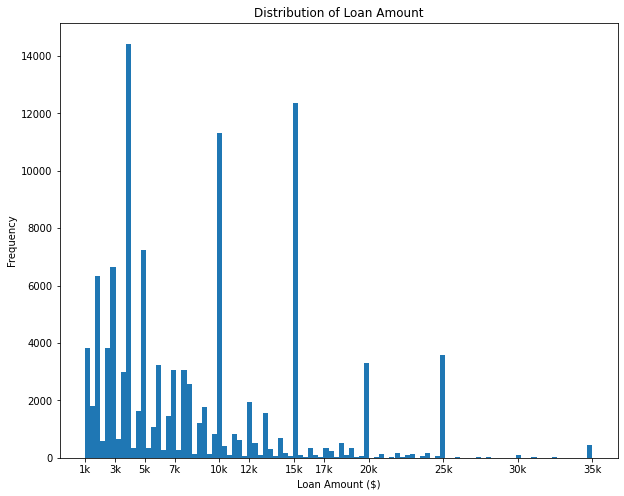

In [214]:
ticks = [1e3, 3e3, 5e3, 10e3, 15e3, 20e3, 25e3, 30e3, 35e3]
ticks_label = [str(int(v/1000))+'k' for v in ticks]


plt.figure(figsize=[10, 8])
binsize = 100
ticks = [1e3, 3e3, 5e3, 7e3, 10e3, 12e3, 15e3, 17e3, 20e3, 25e3, 30e3, 35e3]
labels = [str(int(v/1000))+'k' for v in ticks]
bins = np.arange(ld_small.LoanOriginalAmount.min(), ld_small.LoanOriginalAmount.max()+binsize, binsize)
plt.hist(data=ld_small, x='LoanOriginalAmount', bins=binsize)
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount')
plt.xticks(ticks=ticks, labels=labels)
plt.show()

The data is mostly right skewed with sharp peaks. This might indicated that the values follow a range.

Next, I will scale the data using log transformation to see if the distribution will be different.

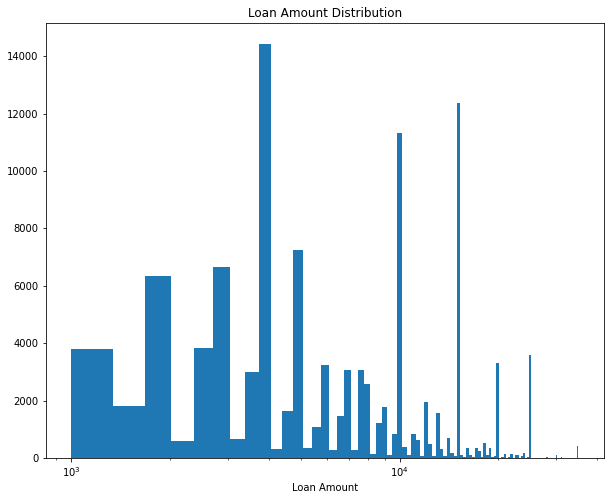

In [215]:
plt.figure(figsize=[10, 8])
binsize = 100
bins = np.arange(ld_small.LoanOriginalAmount.min(), ld_small.LoanOriginalAmount.max()+binsize, binsize)
plt.hist(data=ld_small, x='LoanOriginalAmount', bins=binsize)
plt.xlabel('Loan Amount')
plt.title('Loan Amount Distribution')
plt.xscale('log')

plt.show()

Using a log transformation does not seem to provide any further insight.

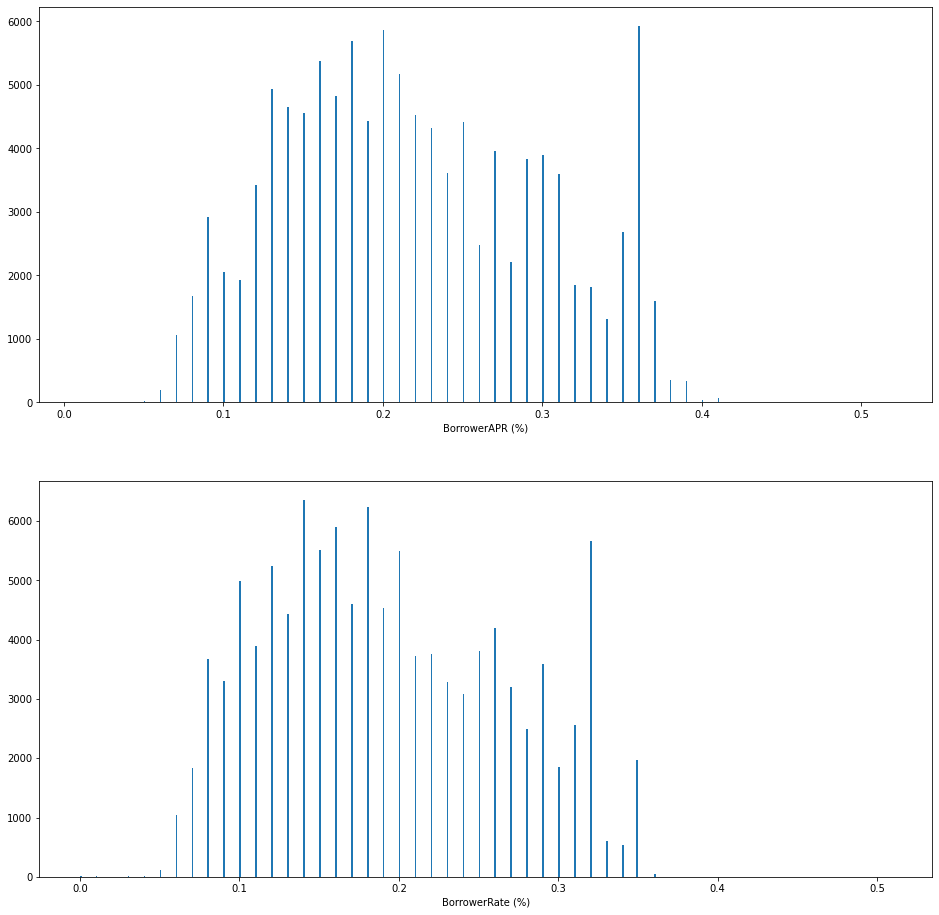

In [216]:
# plotting APR and interest rate
fig, ax = plt.subplots(nrows=2, figsize = [16,16])

variables = ['BorrowerAPR', 'BorrowerRate']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(ld_small[var]), max(ld_small[var])+0.01, 0.001)
    ax[i].hist(data=ld_small, x = var, bins=bins)
    ax[i].set_xlabel('{} (%)'.format(var))

plt.show()

The spaces in the bars of the bars in the borrower APR chart means that there are values between the edges of the bins that have zero frequency. 
The distribution of the Borrower Rate mirrors the distribution of the Borrower APR because interest rates are normally calculated as part of the APR- which represents the overall cost of the loan.

### Univariate exploration of categorical variables

In [217]:
# value count of loan status
ld_small.LoanStatus.value_counts()

Current                   56156
Completed                 36956
Chargedoff                11457
Defaulted                  4836
Past Due (1-15 days)        792
Past Due (31-60 days)       357
Past Due (61-90 days)       301
Past Due (91-120 days)      300
Past Due (16-30 days)       258
FinalPaymentInProgress      205
Past Due (>120 days)         15
Cancelled                     4
Name: LoanStatus, dtype: int64

In [218]:
# value count of Home ownership
ld_small.IsBorrowerHomeowner.value_counts()

True     56701
False    54936
Name: IsBorrowerHomeowner, dtype: int64

In [219]:
# value count of verified income
ld_small.IncomeVerifiable.value_counts()

True     104660
False      6977
Name: IncomeVerifiable, dtype: int64

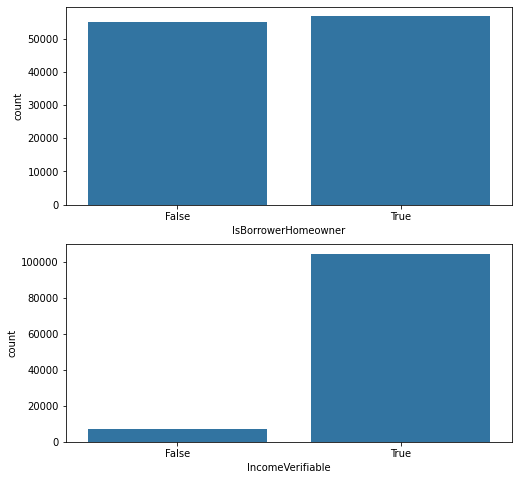

In [220]:
# plotting income verifiability and home ownership.

fig, ax = plt.subplots(nrows=2, figsize=[8, 8])

default_color = sns.color_palette()[0]
sns.countplot(data = ld_small, x = 'IsBorrowerHomeowner', color = default_color, ax = ax[0])
sns.countplot(data = ld_small, x = 'IncomeVerifiable', color = default_color, ax = ax[1])

plt.show()

The number of home owners is slight higher in the dataset. It will be interesting to see how home ownership influences loan amount, interest rate and APR and loan status. 

A large majority of the borrowers have documentation to support their monthly income claims. I would like to see how income verifiability affects loan status.

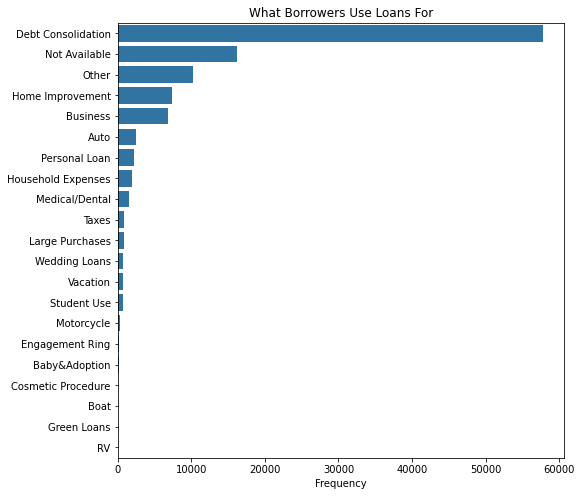

In [221]:
# plotting loan status and listing category
plt.figure(figsize=[8, 8])
default_color = sns.color_palette()[0]
ax = sns.countplot(data = ld_small, y = 'ListingCategory', color = default_color,
order = ld_small['ListingCategory'].value_counts().index)
ax.set(ylabel=None)
ax.set(xlabel='Frequency')
plt.title('What Borrowers Use Loans For')


plt.show()

The most common use for loans is debt consolidation. This means that most borrowers in the dataset are already indebted and likely struggling with their loans. This might correlate with a higher number of trade lines per customer. 

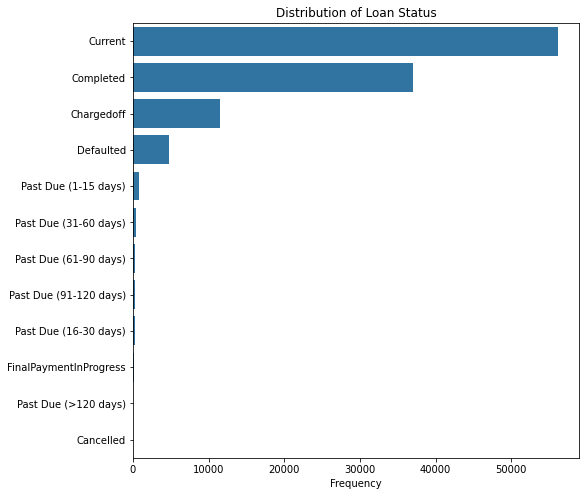

In [222]:
plt.figure(figsize=[8, 8])
default_color = sns.color_palette()[0]
ax = sns.countplot(data = ld_small, y = 'LoanStatus', color = default_color, order=ld_small['LoanStatus'].value_counts().index)
ax.set(ylabel=None)
ax.set(xlabel='Frequency')
plt.title('Distribution of Loan Status')

plt.show()

The vast majority of loans are either being repaid or have been completed. However, about 28k loans have either been charged-off or defaulted. This represents a significant loss to the business. 
In the next plot, I will plot the percentages of the loans as the xticks. 

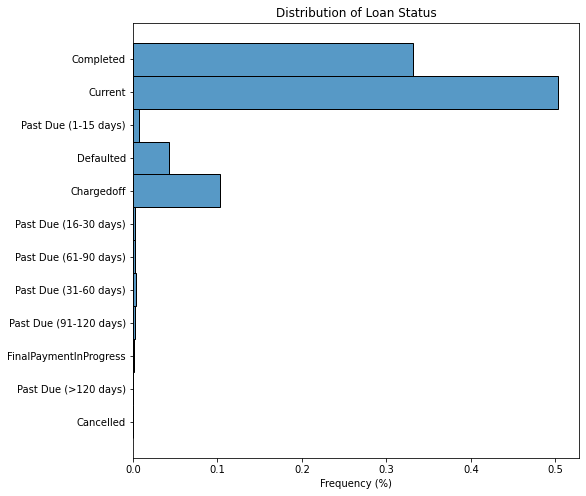

In [223]:
plt.figure(figsize=[8, 8])
default_color = sns.color_palette()[0]
ax = sns.histplot(data = ld_small, y = 'LoanStatus', color = default_color, stat='probability')
plt.xlabel('Percentage Frequency')
ax.set(ylabel=None)
ax.set(xlabel='Frequency (%)')
plt.title('Distribution of Loan Status')
plt.show()

15% of loans have either been charged off or defaulted. 
In a later plot, I will look at the relationship between loan size and loan status.


So far, I've found from univariate exploration that StatedMonthlyIncome is right-skewed with strong outliers to the left of the data. The maximum value appears to have been recorded in error so I removed it from the dataset. I also found after using a log transformation that the majority of values are clustered between 500 - $50k and anything above or below is more likely an outlier. 
Furthermore, the most common use of loans listed on the platform is debt consolidation. This means that there is likely a high number of active trade lines for each customer. 
Lastly, I found that the amount of loans granted never exceeded at $35k. 

## Bivariate Exploration


In [224]:
# first, I want to find the correlation between numeric variables
ld_small.corr()

,BorrowerAPR,BorrowerRate,IsBorrowerHomeowner,StatedMonthlyIncome,IncomeVerifiable,LoanOriginalAmount,TotalTrades
BorrowerAPR,1.000000,0.988453,-0.132323,-0.167716,-0.104639,-0.325648,-0.038735
BorrowerRate,0.988453,1.000000,-0.133731,-0.177828,-0.090082,-0.331747,-0.044866
IsBorrowerHomeowner,-0.132323,-0.133731,1.000000,0.259854,0.054158,0.203475,0.302444
StatedMonthlyIncome,-0.167716,-0.177828,0.259854,1.000000,-0.000246,0.392863,0.299739
IncomeVerifiable,-0.104639,-0.090082,0.054158,-0.000246,1.000000,0.044391,0.040066
LoanOriginalAmount,-0.325648,-0.331747,0.203475,0.392863,0.044391,1.000000,0.171057
TotalTrades,-0.038735,-0.044866,0.302444,0.299739,0.040066,0.171057,1.000000


Below, I will be making a correlation heatmap of the numeric variables.

In [225]:
numeric_vars = ['BorrowerAPR', 'BorrowerRate', 'StatedMonthlyIncome', 'TotalTrades', 'LoanOriginalAmount']

categorical_vars = ['ListingCategory', 'IsBorrowerHomeowner', 'IncomeVerifiable', 'LoanStatus', 'Occupation', 'EmploymentStatus']



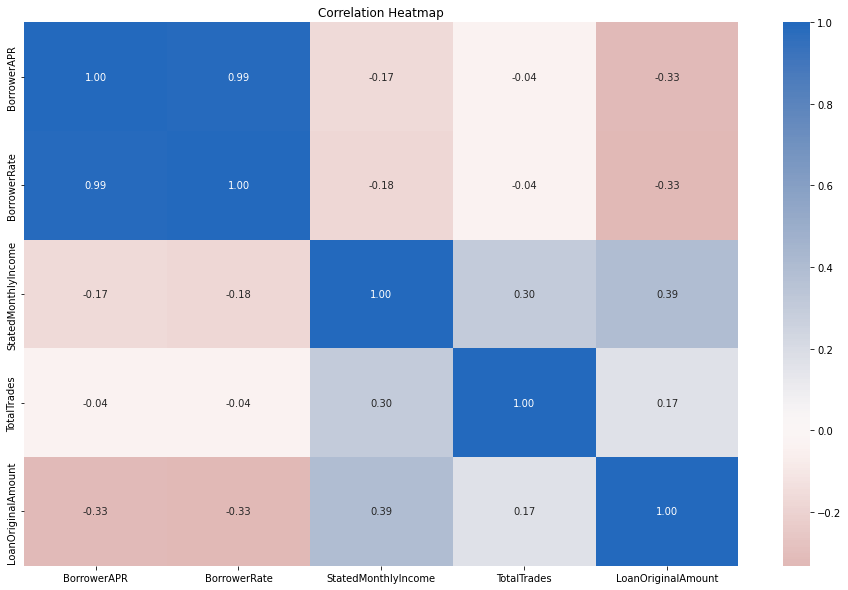

In [226]:
plt.figure(figsize=[16, 10])

sns.heatmap(ld_small[numeric_vars].corr(), annot=True,
fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.title('Correlation Heatmap')
plt.show();

Both the BorrowerAPR and BorrowerRate are highly correlated, so, I can remove one from my analysis. Also, since interest rates are part of APR, which is the overall cost of a loan, I can explore only the APR going further. 
Next, I will be plotting a scatter plot of the correlation matrix to find any relationships that the heatmap could not show.

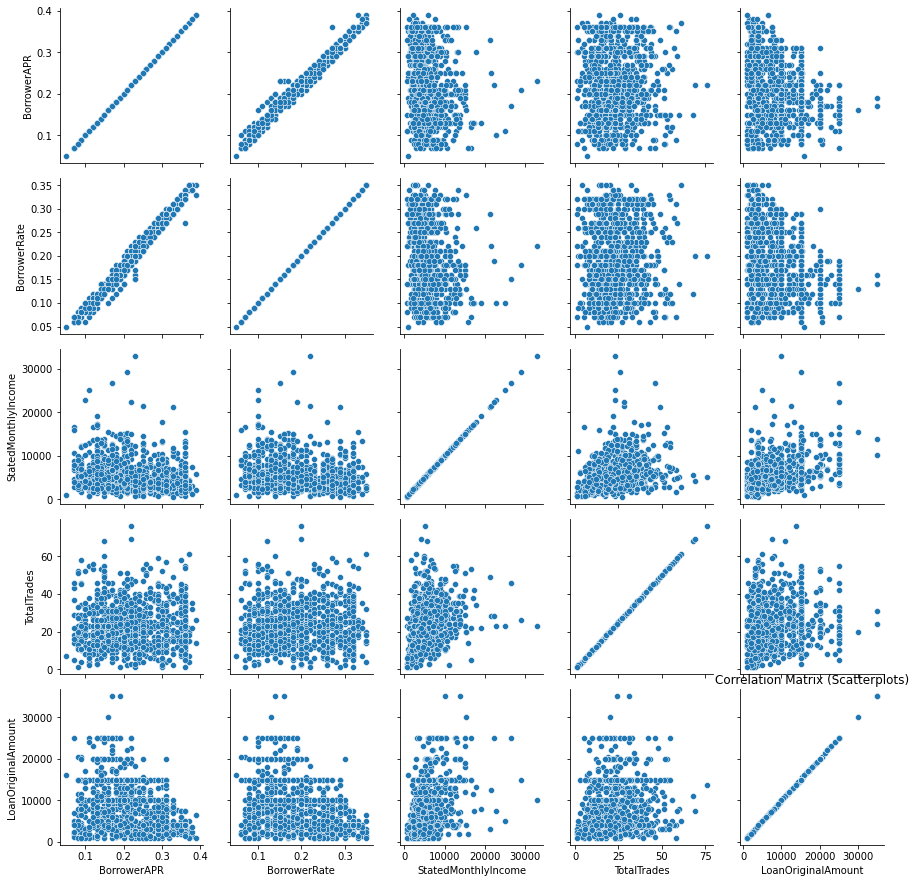

In [227]:
# correlation matrix of numeric variables using a sample of 500 rows
ld_small_samp = ld_small.sample(n=1000, replace = False)

x = sns.PairGrid(data = ld_small_samp, vars = numeric_vars)
x.map(sns.scatterplot)
plt.title('Correlation Matrix (Scatterplots)')
plt.show();

There is a positive relationship between Monthly Income and Total Trades. 
It is hard to see any relationship between APR and interest rates vs monthly income, and APR/interest rate vs totaltrades so I will apply a log transformation on monthly income and total trades.

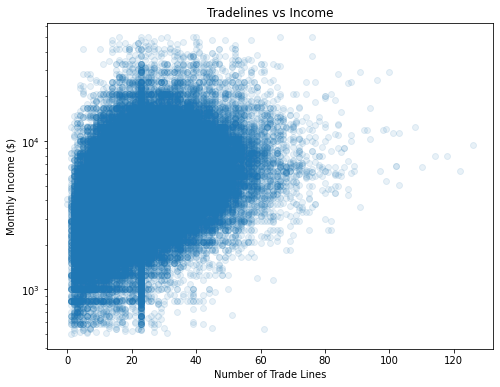

In [228]:
plt.figure(figsize=[8,6])
plt.scatter(data=ld_small, x = 'TotalTrades', y = 'StatedMonthlyIncome', alpha=1/10)
plt.xlabel('TotalTrades')
plt.xlabel('Number of Trade Lines')
plt.ylabel('Monthly Income ($)')
plt.title('Tradelines vs Income')
plt.yscale('log')

plt.show()

There is no linear trend in the relationship between totaltrades and monthly income but there seems to be an upward trend, with the exception of some outliers, the higher a person's income, the higher the number of creditlines they have.

I think the values of Borrower APR are too small as they're expressed in decimal points and the small values are affecting the scatterplots in the correlation grid. I will convert them to full numbers now. 
Eg 0.5 will be 50. 

In [229]:
# changing values of APR and Rate to positive numbers
ld_small['APR100'] = ld_small.BorrowerAPR.apply(lambda x : x * 100)
ld_small['Rate100'] = ld_small.BorrowerRate.apply(lambda x: x * 100)
print(ld_small.APR100.sample(10))
print(ld_small.Rate100.sample(10))

4269     27.0
78117    16.0
32528    31.0
87125    26.0
11128    12.0
65826    23.0
34094    22.0
59336    20.0
87617    31.0
18178    37.0
Name: APR100, dtype: float64
40225    14.0
69045    18.0
92326    10.0
48517    11.0
40753    23.0
30078    15.0
75880    27.0
88546    15.0
81704     9.0
29067    24.0
Name: Rate100, dtype: float64


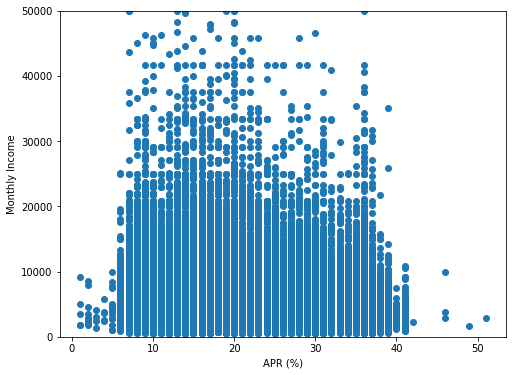

In [230]:
plt.figure(figsize=[8,6])
plt.scatter(data=ld_small, x = 'APR100', y = 'StatedMonthlyIncome')
plt.xlabel('APR (%)')
plt.ylabel('Monthly Income')
plt.ylim([0, 50000])


plt.show()

From the plot above lower income earners pay the same or higher APR than higher income earners. The highest APR levels were recorded for the lowest income values. The higher APR points become sparser as the income level increases. It is also interesting to note that APR can range grom 0 - 42% for monthly earnings of anywhere between 1k to 30k.


### Bivariate exploration of categorical vs numeric variables

The first question I have is what is the size of loans that are cancelled, defaulted, charged off and past due? Are they high or low loan amounts?

<AxesSubplot:xlabel='LoanOriginalAmount', ylabel='LoanStatus'>

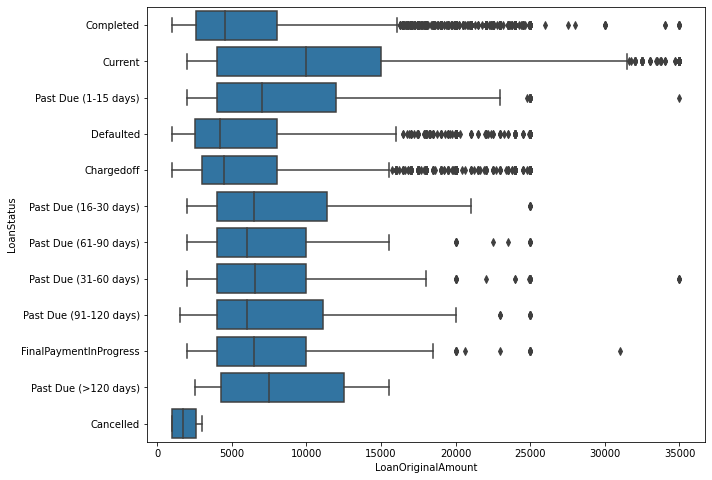

In [231]:

# box plots of loan status vs loan original amount
plt.figure(figsize=[10, 8])
color = sns.color_palette()[0]
sns.boxplot(data=ld_small, x = 'LoanOriginalAmount', y = 'LoanStatus', color=color)

On the above plot, I won't be considering the outliers, only the median loan amounts. 
Generally, only smaller loan amounts are cancelled while the median defaulted and charged-off loans are similar. 
However, the median for completed loans is much lower than those of past due loans. 
This indicates that higher loan amounts are more difficult for borrowers to pay. It might thus be helpful  to reduce the size of loans available to borrowers at once. 
I will also make the above variables into violin plots to have a beter view of the distribution. 

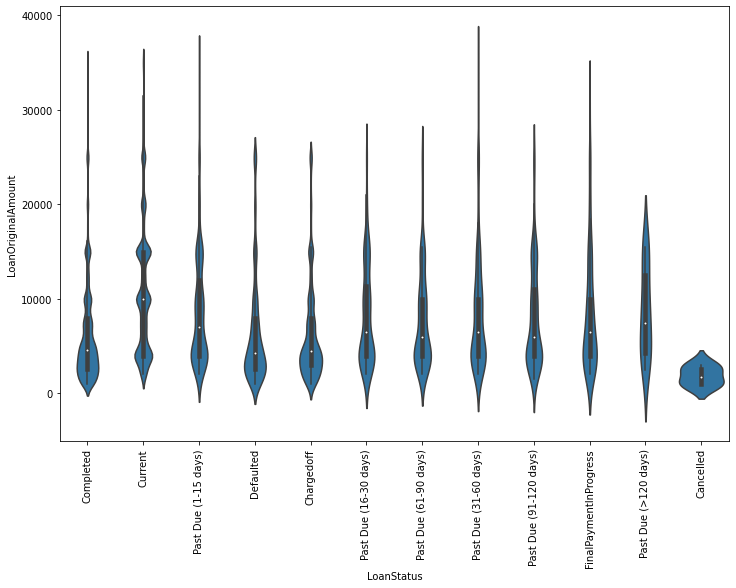

In [232]:
plt.figure(figsize=[12, 8])
sns.violinplot(data=ld_small, x='LoanStatus', y='LoanOriginalAmount', color=color)
plt.xticks(rotation=90)

plt.show()

The violin plot further reinforces the insights gained from the boxplots.
However, it gives further information by showing that cancelled loans do not contain any high income outliers. 
Apart from current loans, loans with more than 120 days past due have the highest median values. Furthermore, all past due loans have higher median loan original amounts than completed loans. 
This means that a high loan size has a negative effect on borrowers' repayment abilities. 
Loans that are currently being paid arguably have  a high likelihood of entering the past due and defaulted buckets since their median original amounts are so high. This is however, not a conclusive postulation as there are other factors to be considered including the income and crediworthiness of the borrower, of which I have not included the latter in my analysis.

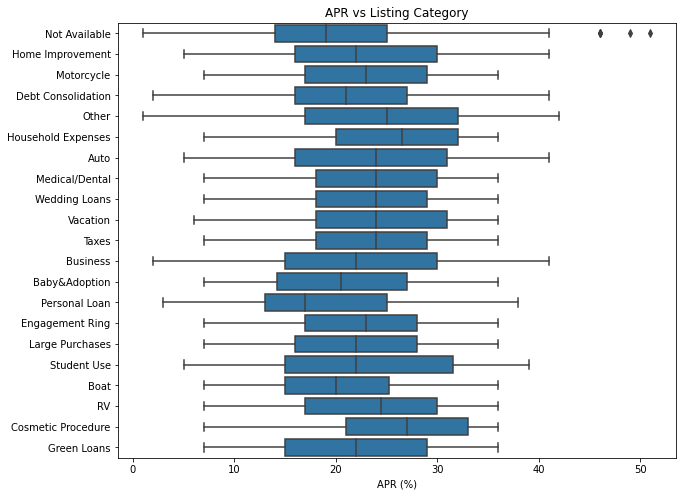

In [233]:
# Listing(Category) vs APR
plt.figure(figsize=[10, 8])
color = sns.color_palette()[0]
ax = sns.boxplot(data=ld_small, x = 'APR100', y = 'ListingCategory', color=color)
plt.title('APR vs Listing Category')
ax.set(ylabel=None)
ax.set(xlabel='APR (%)')

plt.show()

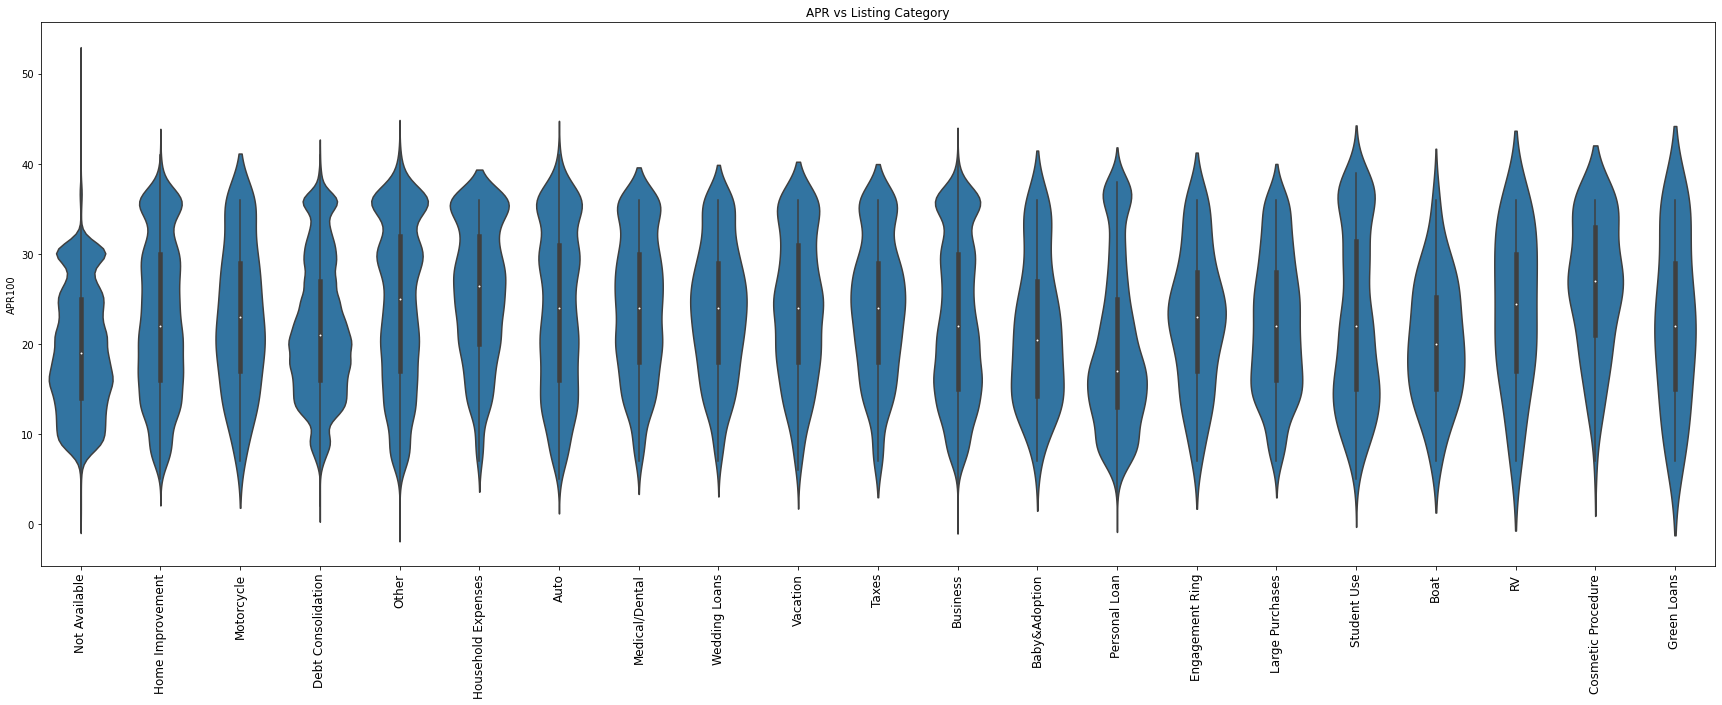

In [234]:
# plotting a violin plot with the same variables above
plt.figure(figsize=[30, 10])
ax = sns.violinplot(data=ld_small, y='APR100', x='ListingCategory', color=color)
plt.title('APR vs Listing Category')
ax.set(xlabel=None)
plt.xticks(rotation=90, fontsize=12)

plt.show()

From the violin plot, the APR of 51% was for  a loan whose use was not stated although the median APR is just shy of 20%. The outlier was not visible in the boxplot. 
Household expenses and cosmetic procedure had the highest median APRs while personal had the lowest median APR. 
This is not good for creditors as their lowest APRs are being given for unstated uses. Household expenses and cosmetic procedures are arguably riskier uses of money as they do not generally bring a return. 


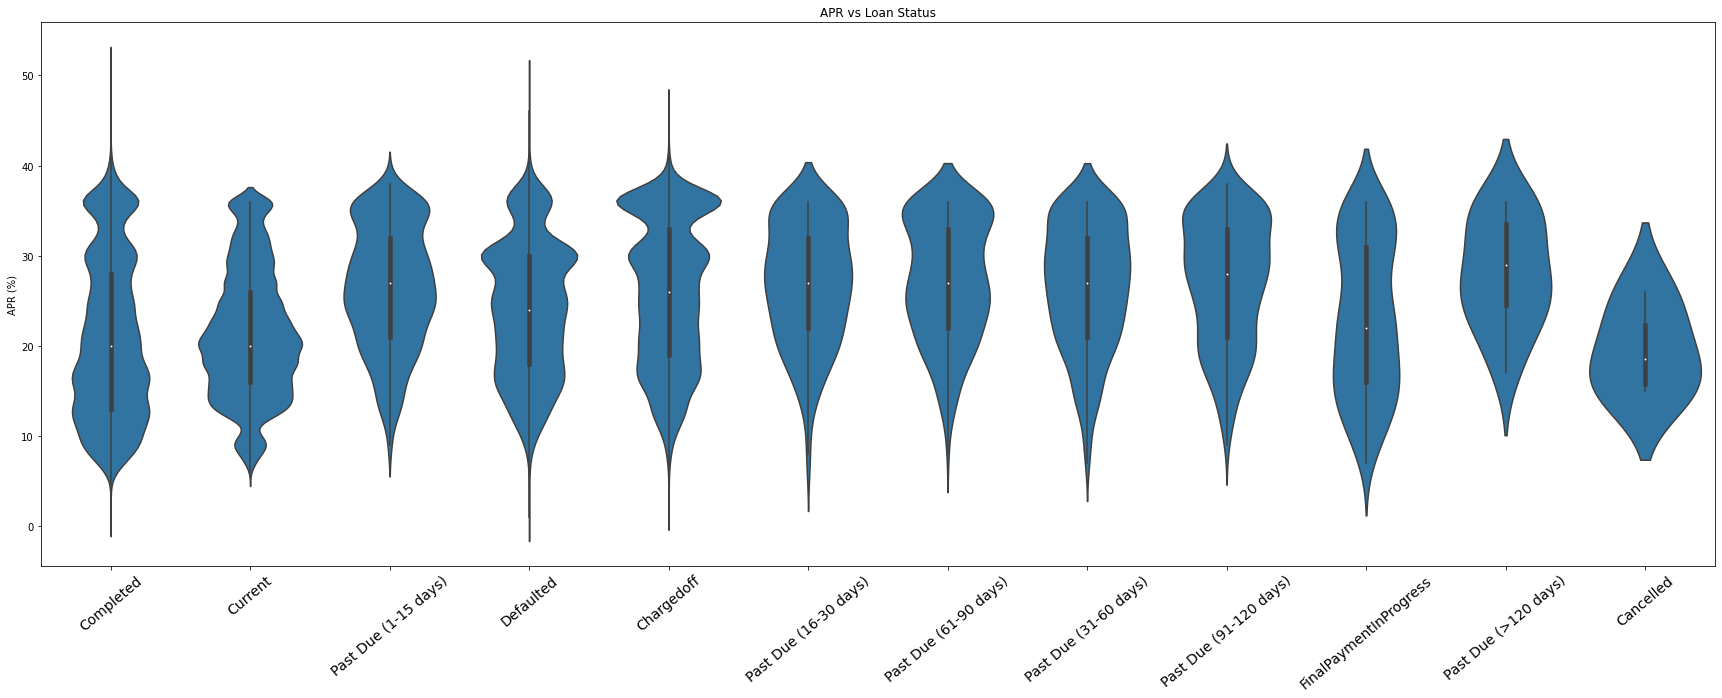

In [235]:
plt.figure(figsize=[30, 10])
ax = sns.violinplot(data=ld_small, y='APR100', x='LoanStatus', color=color)
plt.xticks(rotation=40, fontsize=14)
ax.set(xlabel=None)
ax.set(ylabel='APR (%)')
plt.title('APR vs Loan Status')
plt.show();

Completed and current loans have the smallest median APRs while the APRs for defaulted, chargedoff and past due loans are comparatively higher. This is probably because higher borrowing costs make it harder for people to pay their loans.

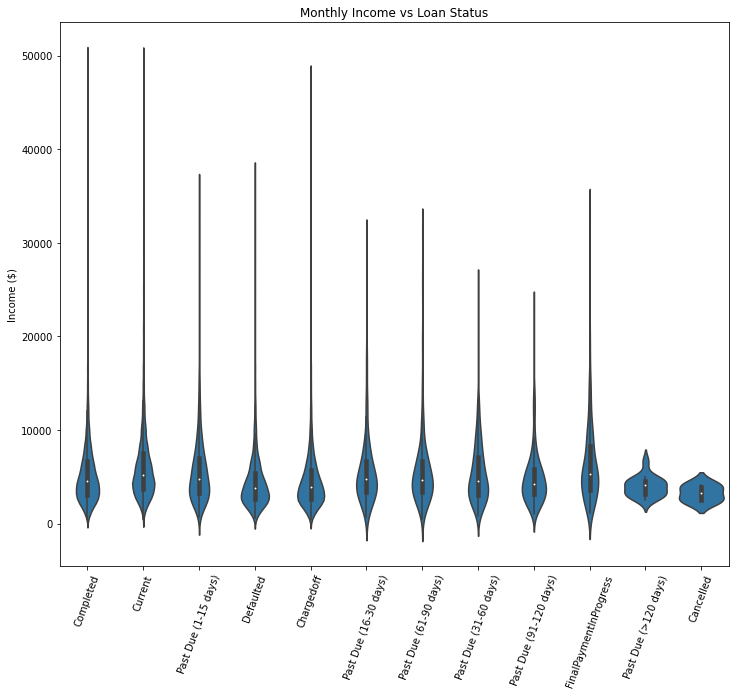

In [236]:
plt.figure(figsize=[12, 10])
ax = sns.violinplot(data=ld_small, y='StatedMonthlyIncome', x='LoanStatus', color=color)
ax.set(ylabel='Income ($)')
ax.set(xlabel=None)
plt.xticks(rotation=70, fontsize=10)
plt.title('Monthly Income vs Loan Status')

plt.show();

This highly right-skewed plot shows that loans above $10k are outliers. Running the describe function on the dataset below, 75% of the values are below $10k. Setting a limit of 15k will probably cover 95% of the income values.

In [237]:
ld_small.StatedMonthlyIncome.describe()

count    111637.000000
mean       5628.968747
std        3764.261291
min         501.000000
25%        3333.000000
50%        4750.000000
75%        6859.000000
max       50000.000000
Name: StatedMonthlyIncome, dtype: float64

In [238]:
_10kbelow = ld_small.query('StatedMonthlyIncome < 15000')

Text(0.5, 1.0, 'Monthly Income vs Listing Category')

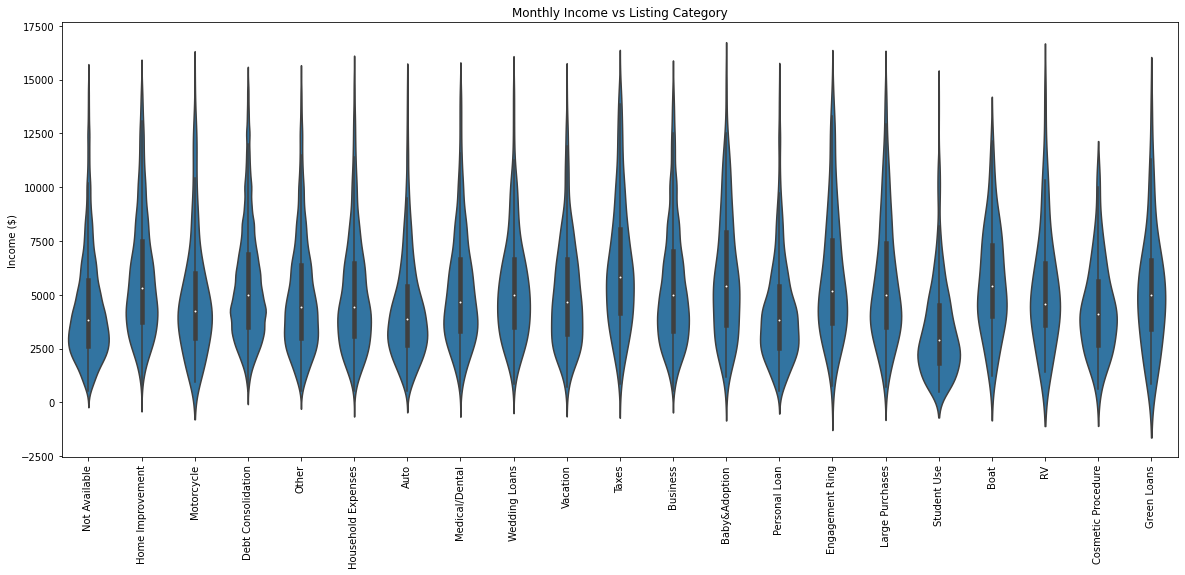

In [239]:
plt.figure(figsize=[20, 8])
ax = sns.violinplot(data=_10kbelow, y='StatedMonthlyIncome', x='ListingCategory', color=color)
ax.set(ylabel='Income ($)', xlabel=None)

plt.xticks(rotation=90, fontsize=10)
plt.title('Monthly Income vs Listing Category')

Removing the outliers should a better view of the income distribution.Incomes above 12.5k are still outliers but this is a better trade-off between too small values and too large values.

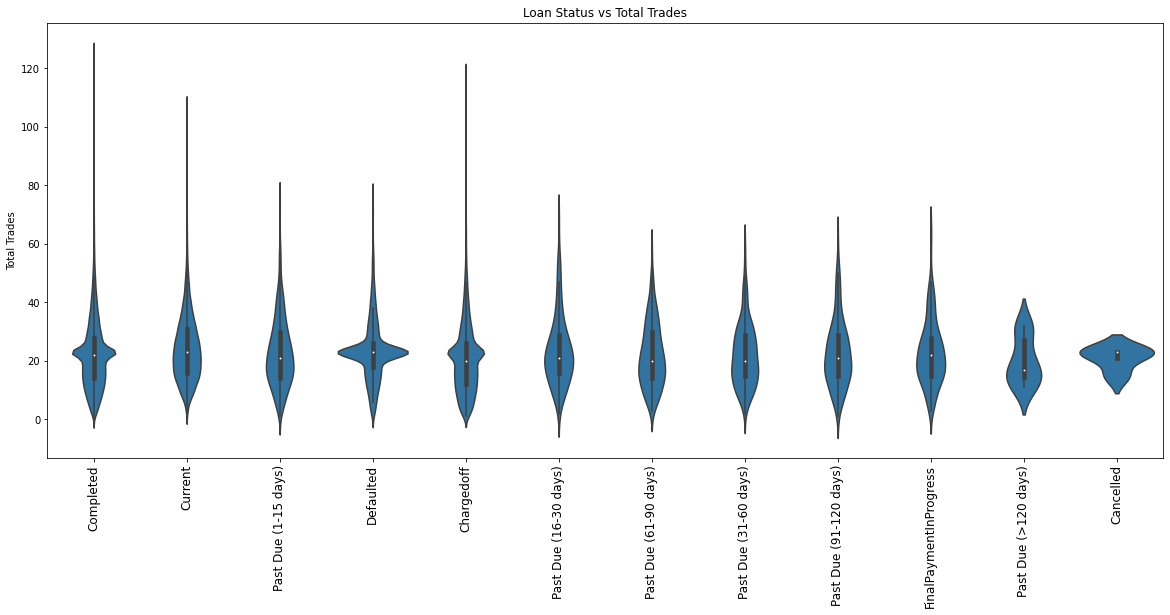

In [240]:
# loan status vs total trades
plt.figure(figsize=[20, 8])
ax = sns.violinplot(data=_10kbelow, y='TotalTrades', x='LoanStatus', color=color)
ax.set(xlabel=None, ylabel='Total Trades')
plt.title('Loan Status vs Total Trades')

plt.xticks(rotation=90, fontsize=12);

The median number of active tradelines is similar for all loans. 
However, defaulted and cancelled loans have their widest points above 20 tradelines. Therefore, it can be inferred that borrowers with smaller number of credit lines have a lower rate of deliquency.

In my bivariate analysis I found that APR does not have a linear relationship with monthly income, so, whether a borrower's APR is high or low has little to do with their monthly income. However, borrowers with very high monthly incomes tend to pay lower in APR fees. 
Another interesting thing I found was that the lowest APRs were being given for unstated uses.
Also, borrowers with a lower number of credit lines had a lower rate of deliquency. 
Finally, I found that larger loan amounts had higher rates of deliquency as it is expected that borrowers will struggle to pay off the loans since the most common use is debt consolidation and the average borrower has 20 trade lines. 

## Multivariate Exploration

In [241]:
# convert LoanStatus into ordered categories
ordinal_var_loanstatus = ['Past Due (1-15 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 'Defaulted', 'Chargedoff', 'Cancelled', 'Current', 'Completed']
ordered_ls = pd.api.types.CategoricalDtype(ordered = True, categories=ordinal_var_loanstatus)
ld_small.LoanStatus = ld_small.LoanStatus.astype(ordered_ls);

In order to visualise the relationship of Occupation and the other variables I will be considering, I will locate the top and bottom 10 occupations in relation to monthly income, because there are over 60 values in the occupation column and a plot using all of them will be incoherent. 

In [242]:
#grouping occupations by mean monthly income in order to retrieve the top 10 income classes with the highest and lowest monthly incomes
grouped_occupations = ld_small.groupby(by = 'Occupation')['StatedMonthlyIncome'].mean().round(2)
grouped_occupations = grouped_occupations.sort_values(ascending=False)
highest_earning_occupations = grouped_occupations[:10]
lowest_earning_occupations = grouped_occupations[-10:]

lowest_earning_occupations

Occupation
Nurse's Aide                          2799.65
Waiter/Waitress                       2574.40
Student - College Graduate Student    2275.29
Teacher's Aide                        2267.49
Student - College Freshman            1966.19
Student - Community College           1873.76
Student - College Junior              1697.62
Student - College Senior              1667.91
Student - Technical School            1558.43
Student - College Sophomore           1320.39
Name: StatedMonthlyIncome, dtype: float64

In [243]:
# retrieving list of highest earning occupations
top10_Occupations_List = highest_earning_occupations.index.to_list()
top10_Occupations_List

['Doctor',
 'Attorney',
 'Judge',
 'Dentist',
 'Executive',
 'Pharmacist',
 'Pilot - Private/Commercial',
 'Investor',
 'Engineer - Chemical',
 'Principal']

In [244]:
# retrieving list of lowest earning occupations
bottom10_Occupations_List = lowest_earning_occupations.index.to_list()
bottom10_Occupations_List

["Nurse's Aide",
 'Waiter/Waitress',
 'Student - College Graduate Student',
 "Teacher's Aide",
 'Student - College Freshman',
 'Student - Community College',
 'Student - College Junior',
 'Student - College Senior',
 'Student - Technical School',
 'Student - College Sophomore']

In [245]:
# creating a subset of the ld_small dataset with just the top 10 Occupations.
top10_data = ld_small[ld_small['Occupation'].isin(top10_Occupations_List)]
print(len(top10_data))
top10_data.Occupation.value_counts()

7071


Executive                     4268
Attorney                      1032
Doctor                         484
Principal                      308
Pharmacist                     257
Engineer - Chemical            223
Investor                       212
Pilot - Private/Commercial     198
Dentist                         67
Judge                           22
Name: Occupation, dtype: int64

In [246]:
# creating a subset of the ld_small dataset with just the bottom 10 Occupations.
bottom10_data = ld_small[ld_small['Occupation'].isin(bottom10_Occupations_List)]
len(bottom10_data)
bottom10_data.Occupation.value_counts()

Nurse's Aide                          485
Waiter/Waitress                       415
Teacher's Aide                        261
Student - College Graduate Student    220
Student - College Senior              140
Student - College Junior               74
Student - College Sophomore            49
Student - College Freshman             32
Student - Community College            25
Student - Technical School             14
Name: Occupation, dtype: int64

In [253]:
top10_data.shape

(7071, 13)

In [255]:
top10_data.query("Occupation == 'Judge' & LoanStatus == 'Past Due (1-15 days)'")

,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,Occupation,EmploymentStatus,IsBorrowerHomeowner,StatedMonthlyIncome,IncomeVerifiable,LoanOriginalAmount,TotalTrades,APR100,Rate100
105633,Past Due (1-15 days),0.29,0.26,Debt Consolidation,Judge,Employed,True,8833,True,11000,35,29.0,26.0


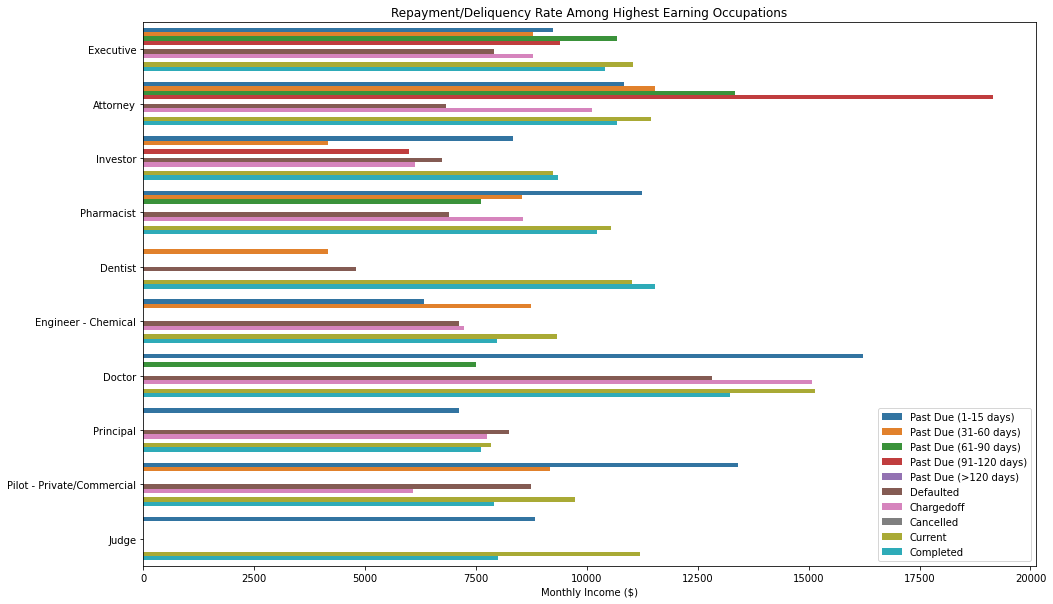

In [256]:
# top 10 occupation by monthly income against income status

fig = plt.figure(figsize = [16,10])
ax = sns.barplot(data = top10_data, y = 'Occupation', x = 'StatedMonthlyIncome', hue = 'LoanStatus',
           palette = 'tab10', ci=None)
plt.title('Repayment/Deliquency Rate Among Highest Earning Occupations')
ax.set(ylabel=None, xlabel='Monthly Income ($)')
plt.legend(loc='lower right')
plt.show();

Most of the highest earners have either completed their loans or are paying them. Attorneys are the highest earners with the most defaults while doctors are the highest earners with the most charge-offs.
Judges are the most profitable accounts because they are either paying off or have completed their payments without any defaults or charge-offs.

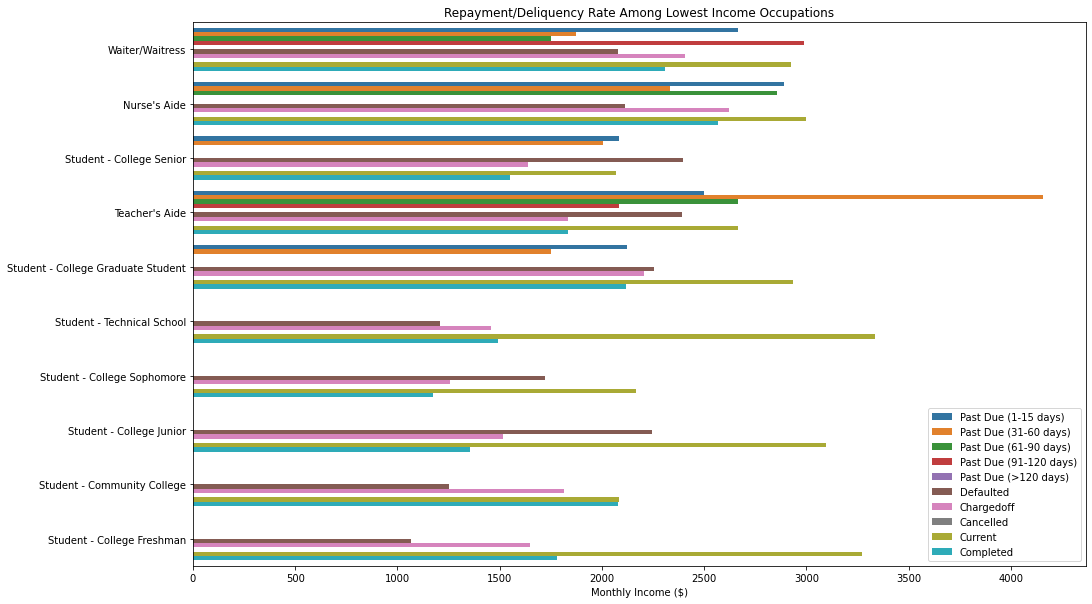

In [248]:
# bottom 10 occupations by monthly income against income status
fig = plt.figure(figsize = [16,10])
ax = sns.barplot(data = bottom10_data, y = 'Occupation', x = 'StatedMonthlyIncome', hue = 'LoanStatus',
           palette = 'tab10', ci=None)
ax.set(ylabel=None, xlabel='Monthly Income ($)')
plt.title('Repayment/Deliquency Rate Among Lowest Income Occupations')
plt.legend(loc='lower right')
plt.show();

As expected, there is a higher level of defaults and charge-offs among lower income earners. 
Teacher's aides are the most likely to default on their loans while graduate students have the highest rate of repayment.

Next, I want to find the relationship between monthly income, occupation and loan original amount.

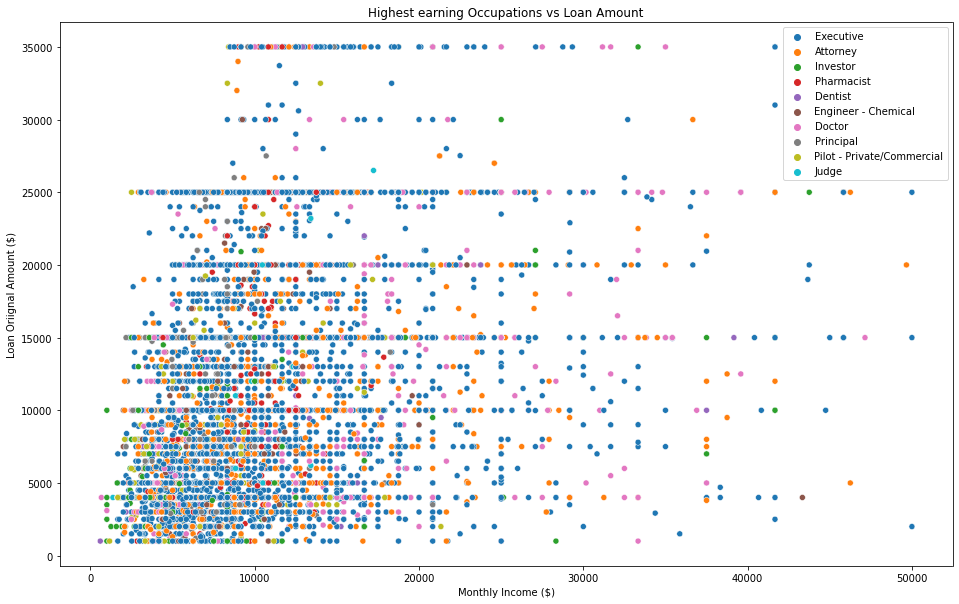

In [249]:
# top 10 loan original amount, stated monthly income and occupation

fig = plt.figure(figsize = [16,10])
ax = sns.scatterplot(data = top10_data, y = 'LoanOriginalAmount', x = 'StatedMonthlyIncome', hue = 'Occupation',
           palette = 'tab10')
plt.title('Highest earning Occupations vs Loan Amount')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Loan Oriignal Amount ($)')
plt.legend(loc='upper right')
plt.show();

Most of the loan amounts are clustered around 0-10k and most of the borrowing is by executives. 
Furthermore, most of the income is clustered around 0 - 10k. 

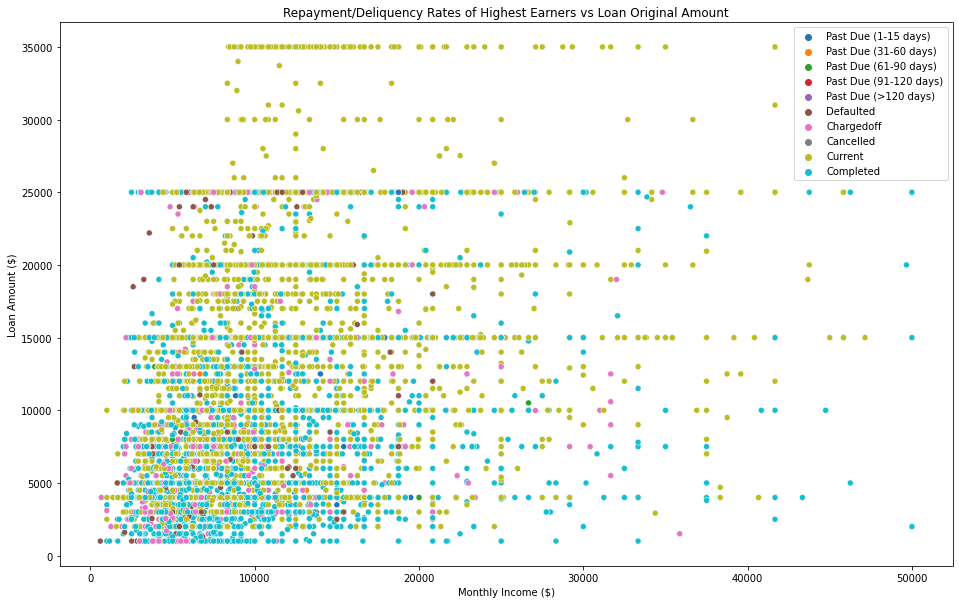

In [250]:
# top 10 stated monthly income, loan original amount and loan status
fig = plt.figure(figsize = [16,10])
ax = sns.scatterplot(data = top10_data, y = 'LoanOriginalAmount', x = 'StatedMonthlyIncome', hue = 'LoanStatus',
           palette = 'tab10')
plt.title('Repayment/Deliquency Rates of Highest Earners vs Loan Original Amount')
ax.set(xlabel='Monthly Income ($)', ylabel='Loan Amount ($)')
plt.legend(loc='upper right')

plt.show();

Most of the loans of the highest income earners are still being serviced. 
Also, the loans with the highest completion rates are the lower value loans.
There is also a low rate of loan defaults among the higher income groups
Also, the highest value loans do not have any defaults or past-due. This shows that higher income earners are more likely to continue to service their loans regardless of the loan amount.

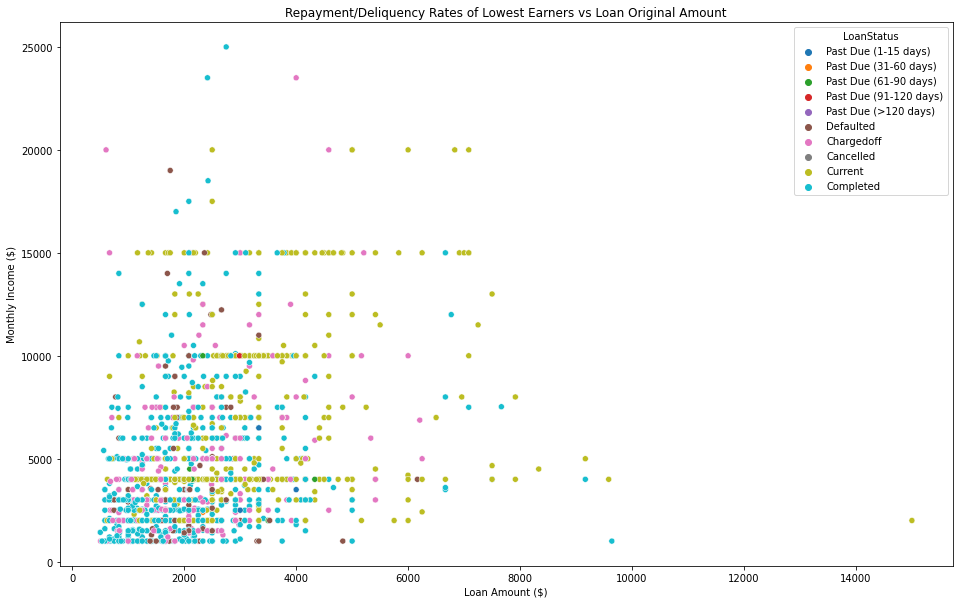

In [251]:
# bottom 10 loan original amount, stated monthly income and occupation
fig = plt.figure(figsize = [16,10])
ax = sns.scatterplot(data = bottom10_data, y = 'LoanOriginalAmount', x = 'StatedMonthlyIncome', hue = 'LoanStatus',
           palette = 'tab10')
plt.title('Repayment/Deliquency Rates of Lowest Earners vs Loan Original Amount')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Monthly Income ($)')

plt.show();

For the lower income earners, the majority of loans have been paid off or are currently being serviced. However, lower income earners with higher loans have a higher likelihood of defaulting. 



Multivariate exploration revealed some interesting insights. 
Firstly, judges are the best borrowers. They earn a high income and have no defaults or charge-offs. All borrowers working as judges are either completing or have paid off their loans. 
Additionally, executives are the most common borrowers among the higher income earners. 

Finally, is generally a higher rate of deliquency among lower income earners. Also, low income earners with larger loan amounts are the most likely to default on their loans. 
Therefore, income has a strong relationship with a borrower's ability to repay their loans.


## Conclusions

>My three main findings from this data exploration are as follows:
- Income and loan amounts are strongly correlated with repayment rate. The higher  a loan amount is compared to the borrower's income, the more likely they are to default on their loan. 

- The lowest APRs are being given for loans with unstated uses. This might affect the profitability of loans if there is no usage provided that lenders can look at in deciding whether to invest or not.

- The most common use for loans is debt consolidation. This point is related to the high rate of deliquency among lower income earners as they would have already been burdened with prior debt and would raise money on Prospa to service their existing loans. I think that this leads to a compounding effect where they then need more money to service their Prospa loans due to an already high debt-to-income ratio. 

